### 1. Bagging Ensemble.

In [1]:
# 설치 필요.
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

#### 1.1. 데이터 읽어오기.

In [3]:
# 데이터 읽어오기.
data = load_breast_cancer()

In [4]:
# 설명 변수.
X = data['data']
variable_names = data['feature_names']
print(variable_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [6]:
# 반응 변수.
# 0 = 'benign'(양성).
# 1 = 'malignant' (악성).
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. Random Forest.

In [8]:
# Random Forest 분류기.
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest accuracy : 0.924


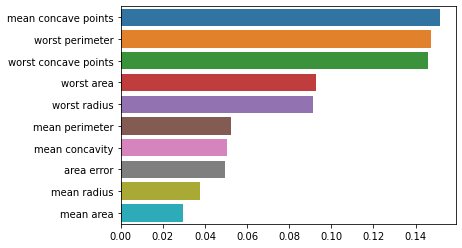

In [9]:
# Top 10 주요 변수 출력.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

### 2. Boosting Ensemble.

#### 2.1.  AdaBoost.

In [10]:
# AdaBoost 분류기.
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123)
ABC.fit(X_train, Y_train)
Y_pred = ABC.predict(X_test)
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost accuracy : 0.924


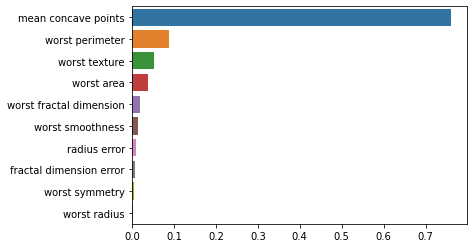

In [11]:
# Top 10 주요 변수 출력.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 2.2.  Gradient Boosting.

In [12]:
# Gradient Boosting 분류기.
GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123)
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Gradient Boosting accuracy : 0.906


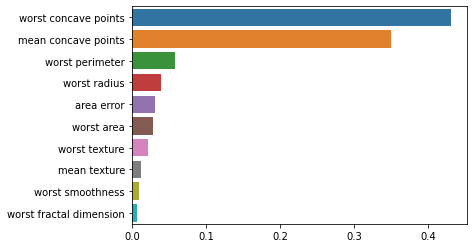

In [13]:
# Top 10 주요 변수 출력.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 2.3. XGBoost.

In [14]:
# XGBoost 분류기.
XGBC = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[09:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy : 0.942


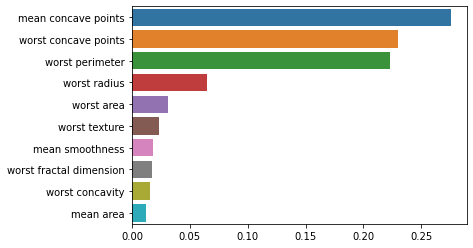

In [15]:
# Top 10 주요 변수 출력.
variable_importance = pd.Series(XGBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

NOTE: XGBClassifier의 하이퍼 파라미터는 GridSearchCV() 또는 RandomSearchCV()를 사용해서 최적화 할 수도 있다.